In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC

from IPython.display import Image
from sklearn import tree
import pydotplus
import os
from os import system
from sklearn.linear_model import LogisticRegression
from datetime import datetime
import pickle

/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pd.set_option('max_seq_items', 200)

In [3]:
shows = pd.read_csv('good_shows_data2.csv')

In [4]:
shows.columns

Index([u'json', u'title_rough', u'check', u'title', u'imdb_id', u'big_json',
       u'seasons', u'cancelled', u'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords',
       u'first_year', u'is_new', u'fixed_runtime', u'is_action',
       u'is_adventure', u'is_animation', u'is_biography', u'is_comedy',
       u'is_crime', u'is_documentary', u'is_drama', u'is_family',
       u'is_fantasy', u'is_game', u'is_history', u'is_horror', u'is_music',
       u'is_musical', u'is_mystery', u'is_news', u'is_reality', u'is_romance',
       u'is_sci', u'is_short', u'is_sport', u'is_talk', u'is_thriller',
       u'is_war', u'is_western', u'release_month', u'release_weekday',
       u'release_monthday', u'stemmed_plot', u'stemmed_keywords',
       u'keyword_adult', u'keyword_african', u'keyword_alien',
       u'keyword_american', u'keyword_angel', u'keyword_anim', u'keyword_base',
       u'keyword_best', u'keyword_black', u'keyword_book', u'keywor

In [5]:
## dropping old shows
shows = shows[shows['release_date']>=1980]

In [6]:
## dropping shows where I don't know whether they were cancelled
shows = shows[shows['seasons'] != 0]

In [7]:
shows['release_date'] = shows['release_date'].dropna().apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
shows['release_month'] = shows['release_date'].dropna().apply(lambda x: x.strftime('%m'))
shows['release_month'] = shows['release_month'].dropna().apply(lambda x: int(x))
shows['release_weekday'] = shows['release_date'].dropna().apply(lambda x: x.strftime('%w'))
shows['release_weekday'] = shows['release_weekday'].dropna().apply(lambda x: int(x))

shows['started_sunday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==0 else 0)
shows['started_monday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==1 else 0)
shows['started_tuesday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==2 else 0)
shows['started_wednesday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==3 else 0)
shows['started_thursday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==4 else 0)
shows['started_friday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==5 else 0)
shows['started_saturday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==6 else 0)

In [8]:
shows['started_on_first'] = shows['release_monthday'].dropna().apply(lambda x: 1 if x==1 else 0)

In [9]:
shows.columns

Index([u'json', u'title_rough', u'check', u'title', u'imdb_id', u'big_json',
       u'seasons', u'cancelled', u'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords',
       u'first_year', u'is_new', u'fixed_runtime', u'is_action',
       u'is_adventure', u'is_animation', u'is_biography', u'is_comedy',
       u'is_crime', u'is_documentary', u'is_drama', u'is_family',
       u'is_fantasy', u'is_game', u'is_history', u'is_horror', u'is_music',
       u'is_musical', u'is_mystery', u'is_news', u'is_reality', u'is_romance',
       u'is_sci', u'is_short', u'is_sport', u'is_talk', u'is_thriller',
       u'is_war', u'is_western', u'release_month', u'release_weekday',
       u'release_monthday', u'stemmed_plot', u'stemmed_keywords',
       u'keyword_adult', u'keyword_african', u'keyword_alien',
       u'keyword_american', u'keyword_angel', u'keyword_anim', u'keyword_base',
       u'keyword_best', u'keyword_black', u'keyword_book', u'keywor

In [10]:
shows = shows.drop(['json', u'title_rough', u'check', u'big_json',
       u'seasons', 'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords', u'is_new', 
        'stemmed_plot', u'stemmed_keywords', 'plot_cleaned', u'network', 'release_month', 
                    'release_weekday', 'fixed_runtime', 'keyword_new'], axis=1)


In [11]:
## export clean modeling data

# shows.to_csv('clean_modeling_data.csv')


In [12]:
shows = shows.drop(['title', 'imdb_id'], axis=1)

In [13]:
shows.shape

(2061, 144)

In [14]:
# shows.columns

In [15]:
shows.shape

(2061, 144)

In [16]:
shows.dropna().shape

(2061, 144)

In [17]:
## defining dependent/independent variables
y = shows['cancelled']
x = shows.drop('cancelled', axis=1)

In [18]:
# x.columns

In [19]:
## Base probability
y.mean()

0.39349830179524503

In [20]:
## train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [21]:
# x_train.shape

In [22]:
# x_test.shape

In [23]:
# y_train.shape

In [24]:
# y_test.shape

In [25]:
## runs model
def run_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    print "Training set score: ", model.score(x_train, y_train)
    print "Test set score: ", model.score(x_test, y_test)
    predictions = model.predict(x_test)
    print "\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1'])
    print "\nClassification Report:\n",classification_report(y_test, predictions)

In [26]:
## plots ROC curve
def plot_roc(x_test, y_test, model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print 'ROC AUC: %0.2f' % roc_auc
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

In [27]:
rf = RandomForestClassifier(min_samples_leaf=5)

In [28]:
run_model(x_train, y_train, x_test, y_test, rf)

Training set score:  0.75857605178
Test set score:  0.68992248062

Confusion Matrix:
      predicted_0  predicted_1
is_0          265           52
is_1          108           91

Classification Report:
             precision    recall  f1-score   support

          0       0.71      0.84      0.77       317
          1       0.64      0.46      0.53       199

avg / total       0.68      0.69      0.68       516



In [29]:
rf.predict_proba(x_test)

array([[ 0.68045666,  0.31954334],
       [ 0.65230186,  0.34769814],
       [ 0.75478732,  0.24521268],
       ..., 
       [ 0.53136484,  0.46863516],
       [ 0.68770066,  0.31229934],
       [ 0.58899463,  0.41100537]])

ROC AUC: 0.73


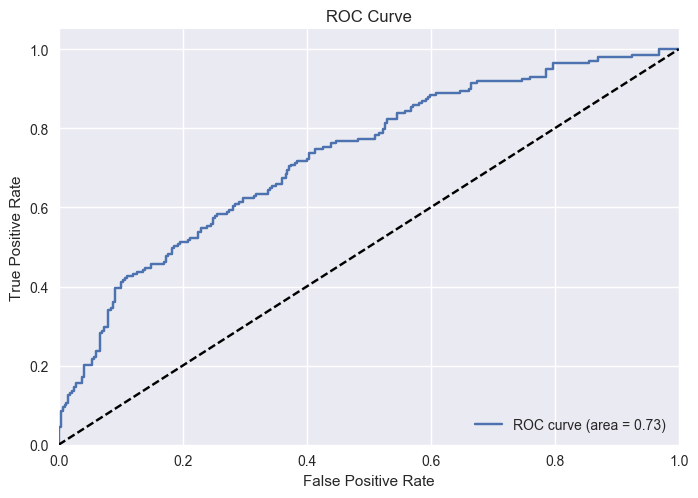

In [30]:
plot_roc(x_test, y_test, rf)

In [31]:
x_train.shape

(1545, 143)

## Random Forest with grid search

In [32]:
 parameters = {
     "n_estimators" : [10, 25, 50, 100],
    "max_depth" : [5,7,10,15],
     "max_features" : [0.25, 0.5, 0.75],
     "min_samples_leaf" : [2,3,4,5]
 }

In [33]:
gs_rf = RandomForestClassifier()
grid_search = GridSearchCV(gs_rf,param_grid=parameters, cv=7, n_jobs=-1, scoring='recall')

In [34]:
## 12:21 - 12:22
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 100], 'max_features': [0.25, 0.5, 0.75], 'max_depth': [5, 7, 10, 15], 'min_samples_leaf': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [35]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
run_model(x_train, y_train, x_test, y_test, grid_search.best_estimator_)

Training set score:  0.906796116505
Test set score:  0.699612403101

Confusion Matrix:
      predicted_0  predicted_1
is_0          257           60
is_1           95          104

Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.81      0.77       317
          1       0.63      0.52      0.57       199

avg / total       0.69      0.70      0.69       516



ROC AUC: 0.72


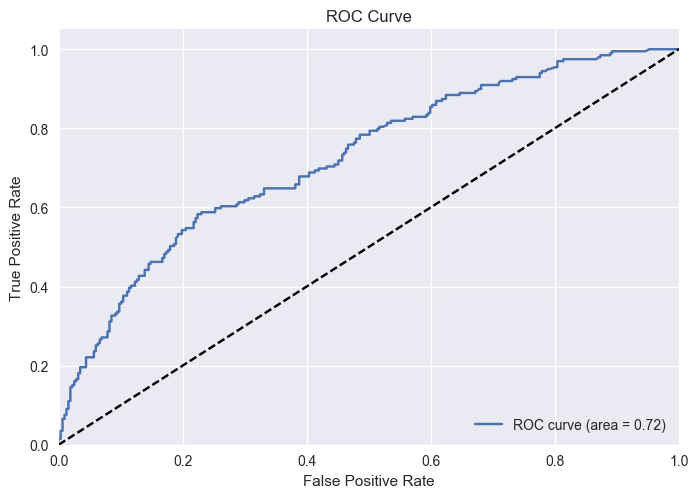

In [37]:
plot_roc(x_test, y_test, grid_search.best_estimator_)


In [38]:
gsrf_pickle_path = 'model_implementation/gsrf_pickle.pkl'
gsrf_pickle = open(gsrf_pickle_path, 'wb')
pickle.dump(grid_search.best_estimator_, gsrf_pickle)
gsrf_pickle.close()

In [39]:
# grid_search.best_estimator_.predict_proba(x_test)

In [40]:
# rf_feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
#                                    index = x_train.columns,
#                                     columns=['importance']).sort_values('importance',
#                                     ascending=False)
# rf_feature_importances.head(20)

## Decision Tree

In [41]:
# DecisionTreeClassifier()

In [42]:
## tune hyperparameters here
# dt = DecisionTreeClassifier(
#     max_depth=15, 
#     min_samples_leaf=4,
#     max_leaf_nodes=8,
#     criterion='gini'
# )

In [43]:
# run_model(x_train, y_train, x_test, y_test, dt)

In [44]:
# plot_roc(x_test, y_test, dt)

In [45]:
def tune_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    print "Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, new_predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1'])
    print "\nClassification Report:\n", classification_report(y_test, new_predictions)
    plt.hist(new_predictions)
    plt.xlabel('New Predictions')
    plt.ylabel('Frequency')
    plt.title('Distribution of New Predictions')
    plt.show()

In [46]:
# tune_predictions(dt, x_test, y_test, .30)

In [47]:
# tune_predictions(dt, x_test, y_test, .60)

In [48]:
## plots the distribution of prediction probabilities for the 1 class
# def plot_proba(x_test, model):
#     predict = model.predict_proba(x_test)
#     plt.hist(predict[:,1], bins=40)
#     plt.ylabel('Frequency')
#     plt.xlabel('Class 1 Probability Cutoff')
#     plt.show()

In [49]:
# plot_proba(x_test, dt)

In [50]:
# plt.hist(predict[:,1])

In [51]:
# plt.hist(predict)

In [52]:
# plt.hist(predictions_60)

In [53]:
# confusion_matrix(y_test, predictions_60)

In [54]:
# tune_predictions(dt, x_test, y_test, .30)

In [55]:
# tune_predictions(dt, x_test, y_test, .40)

## grid-searching the decision tree

In [56]:
# dt_for_gs = DecisionTreeClassifier()

In [57]:
# params_dt = {
#     "max_depth":[10,15,20],
#     "min_samples_leaf":[2,3,4,5],
#     "max_leaf_nodes":[4,6,8,10],
#     "criterion":['gini', 'entropy']
# }

In [58]:
# gs_dt = GridSearchCV(dt_for_gs, params_dt)

In [59]:
# gs_dt.fit(x_train, y_train)

In [60]:
# gs_dt.best_estimator_

In [61]:
# run_model(x_train, y_train, x_test, y_test, gs_dt.best_estimator_)

In [62]:
## in the original model, the false negatives were higher than the true positives. This is terrible, and needs fixing.


# plot_proba(x_test, gs_dt.best_estimator_)

In [63]:
## with probability=0.4, model score is 0.62. the false negatives are down, but the false positives are up.
# tune_predictions(gs_dt, x_test, y_test, .40)

In [64]:
# confusion_matrix(y_test, predictions_60)

In [65]:
def get_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    return new_predictions

In [66]:
def find_optimal_probability(model, x_test, y_test):
    probabilities = range(1,101)
    new_probabilities = []
    for i in probabilities:
        new_probabilities.append(float(i)/100)
    range_of_scores = []
    for i in new_probabilities:
        new_preds = get_predictions(model, x_test, y_test, i)
        cmatrix = confusion_matrix(y_test, new_preds)
        new_model_score = (cmatrix[0,0] + cmatrix[1,1])/float(np.sum(cmatrix))
        range_of_scores.append(new_model_score)
    
    plt.plot(new_probabilities, range_of_scores)
    plt.title("Model Scores at Different Cutoff Probabilities")
    plt.xlabel("Probability Cutoff")
    plt.ylabel("Model Score")
    plt.show()

In [67]:
# find_optimal_probability(dt, x_test, y_test)

## Gradient Boosting

In [68]:
# GradientBoostingClassifier()

In [69]:
# boost_default = GradientBoostingClassifier()

In [70]:
# boost = GradientBoostingClassifier(
#     n_estimators=500, 
#     max_depth= 6,
#     learning_rate= 0.1, 
#     min_samples_leaf=2
#     )

In [71]:
# run_model(x_train, y_train, x_test, y_test, boost)

In [72]:
# run_model(x_train, y_train, x_test, y_test, boost_default)

In [73]:
# boost_feature_importances = pd.DataFrame(boost_default.feature_importances_,
#                                    index = x_train.columns,
#                                     columns=['importance']).sort_values('importance',
#                                     ascending=False)
# boost_feature_importances.head(20)

# XGBoost

In [74]:
# xgb = XGBClassifier()

In [75]:
# run_model(x_train, y_train, x_test, y_test, xgb)

## ADA Boosting

In [76]:
rfc = RandomForestClassifier(min_samples_leaf=4)

In [77]:
ada_default = AdaBoostClassifier()

In [78]:
ada = AdaBoostClassifier(base_estimator=rfc, n_estimators=100)

In [79]:
ada_boost = AdaBoostClassifier(n_estimators=100)

In [80]:
ada_default

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [81]:
run_model(x_train, y_train, x_test, y_test, ada_default)

Training set score:  0.714563106796
Test set score:  0.684108527132

Confusion Matrix:
      predicted_0  predicted_1
is_0          244           73
is_1           90          109

Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.77      0.75       317
          1       0.60      0.55      0.57       199

avg / total       0.68      0.68      0.68       516



In [82]:
run_model(x_train, y_train, x_test, y_test, ada)

Training set score:  1.0
Test set score:  0.65503875969

Confusion Matrix:
      predicted_0  predicted_1
is_0          239           78
is_1          100           99

Classification Report:
             precision    recall  f1-score   support

          0       0.71      0.75      0.73       317
          1       0.56      0.50      0.53       199

avg / total       0.65      0.66      0.65       516



In [83]:
run_model(x_train, y_train, x_test, y_test, ada_boost)

Training set score:  0.716504854369
Test set score:  0.684108527132

Confusion Matrix:
      predicted_0  predicted_1
is_0          242           75
is_1           88          111

Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.76      0.75       317
          1       0.60      0.56      0.58       199

avg / total       0.68      0.68      0.68       516



In [84]:
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [85]:
ada_boost.score(x_train, y_train)

0.71650485436893208

In [86]:
ada_boost.score(x_test, y_test)

0.68410852713178294

In [87]:
ada_boost.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1,

## pickling adaboost

In [88]:
ada_boost_pickle_path = 'model_implementation/ada_boost_pickle.pkl'
ada_boost_pickle = open(ada_boost_pickle_path, 'wb')
pickle.dump(ada_boost, ada_boost_pickle)
ada_boost_pickle.close()

ROC AUC: 0.73


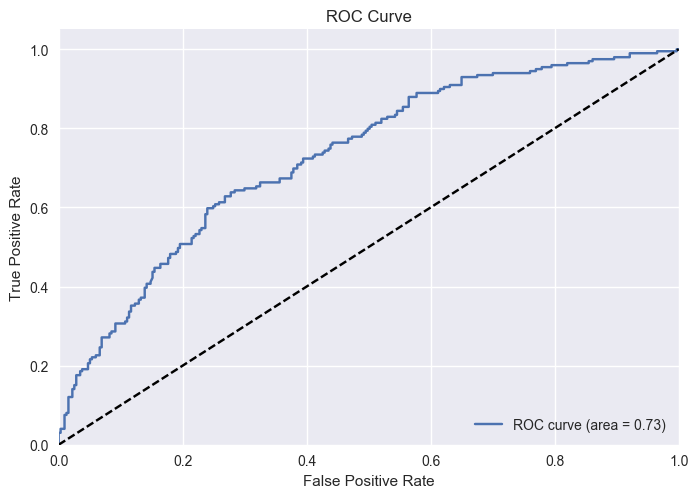

In [89]:
plot_roc(x_test, y_test, ada_boost)

In [90]:
# find_optimal_probability(ada_boost, x_test, y_test)

In [91]:
adaboost_feature_importances = pd.DataFrame(ada_boost.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
adaboost_feature_importances.head(20)

,importance
first_year,0.15
release_monthday,0.06
full_hour,0.03
half_hour,0.03
keyword_york,0.02
is_documentary,0.02
from_Nickelodeon,0.02
keyword_relationship,0.02
is_reality,0.02
keyword_offic,0.01


In [92]:
x_test.shape

(516, 143)

In [93]:
x_test.columns.sort_values()[91]

'keyword_offic'

In [94]:
x_test.columns.sort_values()

Index([u'first_year', u'from_ABC', u'from_CBS', u'from_Cartoon',
       u'from_Comedy', u'from_Disney', u'from_Fox', u'from_HBO', u'from_MTV',
       u'from_NBC', u'from_Nickelodeon', u'from_WB', u'full_hour',
       u'half_hour', u'is_action', u'is_adventure', u'is_animation',
       u'is_biography', u'is_comedy', u'is_crime', u'is_documentary',
       u'is_drama', u'is_family', u'is_fantasy', u'is_game', u'is_history',
       u'is_horror', u'is_music', u'is_musical', u'is_mystery', u'is_news',
       u'is_reality', u'is_romance', u'is_sci', u'is_short', u'is_sport',
       u'is_talk', u'is_thriller', u'is_war', u'is_western', u'keyword_adult',
       u'keyword_african', u'keyword_alien', u'keyword_american',
       u'keyword_angel', u'keyword_anim', u'keyword_base', u'keyword_best',
       u'keyword_black', u'keyword_book', u'keyword_boy', u'keyword_boyfriend',
       u'keyword_brother', u'keyword_california', u'keyword_celebr',
       u'keyword_charact', u'keyword_child', u'keyword_

## Decision tree for show

In [95]:
## this will create a single decision tree from the whole dataset that is readable by humans. 
## for display purposes only. it will be tuned to have approximately the same score as the AdaBoost model

# dt_for_show = DecisionTreeClassifier(
#                     max_depth=7,
#                     min_samples_leaf=5,
#                     max_leaf_nodes=10
#     class_weight=None, criterion='gini', max_depth=10,
#             max_features=None, max_leaf_nodes=10, min_samples_leaf=2,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             presort=False, random_state=None, splitter='best'
)

SyntaxError: invalid syntax (<ipython-input-95-bdb49d72b0bf>, line 12)

In [ ]:
# dt_for_show.fit(x,y)

In [ ]:
# dt_for_show.score(x,y)

In [ ]:
## exporting decision tree to png

# dtree = dt_for_show.fit(x, y)

# dotfile = open("dtree2.dot", 'w')
# tree.export_graphviz(dtree, 
#                      out_file = dotfile, 
#                      feature_names = x.columns, 
#                      class_names=['renewed', 'cancelled'],  
#                      filled=True, 
#                      rounded=True,
#                      special_characters=True,
#                      impurity=False,
#                      label='none'
#                     )
# dotfile.close()

# system('dot -Tpng dtree2.dot -o dtree2.png')

In [ ]:
# dt_show_feature_importances = pd.DataFrame(dt_for_show.feature_importances_,
#                                    index = x_train.columns,
#                                     columns=['importance']).sort_values('importance',
#                                     ascending=False)
# dt_show_feature_importances.head(20)

## Logistic regression

In [ ]:
# lr = LogisticRegression()

In [ ]:
# run_model(x_train, y_train, x_test, y_test, lr)

In [ ]:
# x['started_saturday'].sum()

# Support Vector Machines

In [ ]:
# svc = SVC(verbose=True)
# nusvc = NuSVC()
# linsvc = LinearSVC()

In [ ]:
# run_model(x_train, y_train, x_test, y_test, svc)

In [ ]:
# run_model(x_train, y_train, x_test, y_test, nusvc)

In [ ]:
# run_model(x_train, y_train, x_test, y_test, linsvc)